#### Challenge Set 2  
**Topic:**         Pandas (movies data)  
**Date:**          10 October 2016  
**Name:**          Ron Olshansky-Lucero  
**Worked with:**   N/A

In [126]:
# Python 2/3 compatibility
from __future__ import print_function, division

#
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

%matplotlib inline

import time
import re
import csv
import pickle
import dateutil.parser
from pprint import pprint

In [127]:
df = pd.read_csv('2013_movies.csv', header=0, index_col = None)

In [128]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [129]:
df.info() # missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [130]:
df.dropna(inplace = True)

In [131]:
df.info() # dropped 13 observations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ KB


#### Exercise 2.1
Plot domestic total gross over time.

In [132]:
# convert `ReleaseDate` into datetime object
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.4+ KB


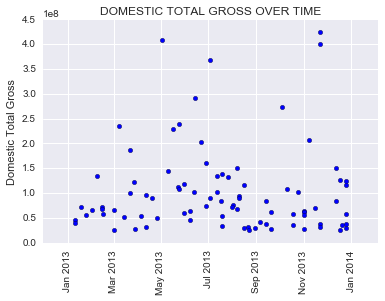

In [133]:
# cast ReleaseDate as np array
# (to avoid error when using scatter)
plt.scatter(np.array(df.ReleaseDate), df.DomesticTotalGross)
plt.xticks(rotation = 90)
plt.title('DOMESTIC TOTAL GROSS OVER TIME')
plt.ylabel('Domestic Total Gross')

#### Exercise 2.2
Plot runtime vs. domestic total gross.

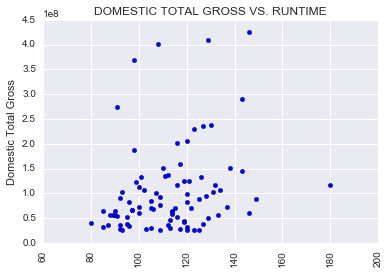

In [134]:
# cast Runtime as np array
# (to avoid error when using scatter)
plt.scatter(df.Runtime, df.DomesticTotalGross)
plt.xticks(rotation = 90)
plt.title('DOMESTIC TOTAL GROSS VS. RUNTIME')
plt.ylabel('Domestic Total Gross')

#### Exercise 2.3
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [135]:
# groupby results show the mean for numeric variables at each level of Rating.
(df
 .groupby(['Rating'])
 .mean())

,Budget,DomesticTotalGross,Runtime
Rating,,,
PG,9.507143e+07,1.319459e+08,100.285714
PG-13,9.877500e+07,1.177266e+08,117.350000
R,3.886364e+07,7.422795e+07,111.939394


#### Exercise 2.4
Make one figure with N (= the number of MPAA ratings there are) subplots, and in each plot the release date vs. the domestic total gross.

In [136]:
df.Rating.unique() # need 3 subplots

array(['PG-13', 'PG', 'R'], dtype=object)

In [137]:
# construct a separate DataFrame for each Rating level
pg_df = df[df.Rating == 'PG']
pg13_df = df[df.Rating == 'PG-13']
r_df = df[df.Rating == 'R']

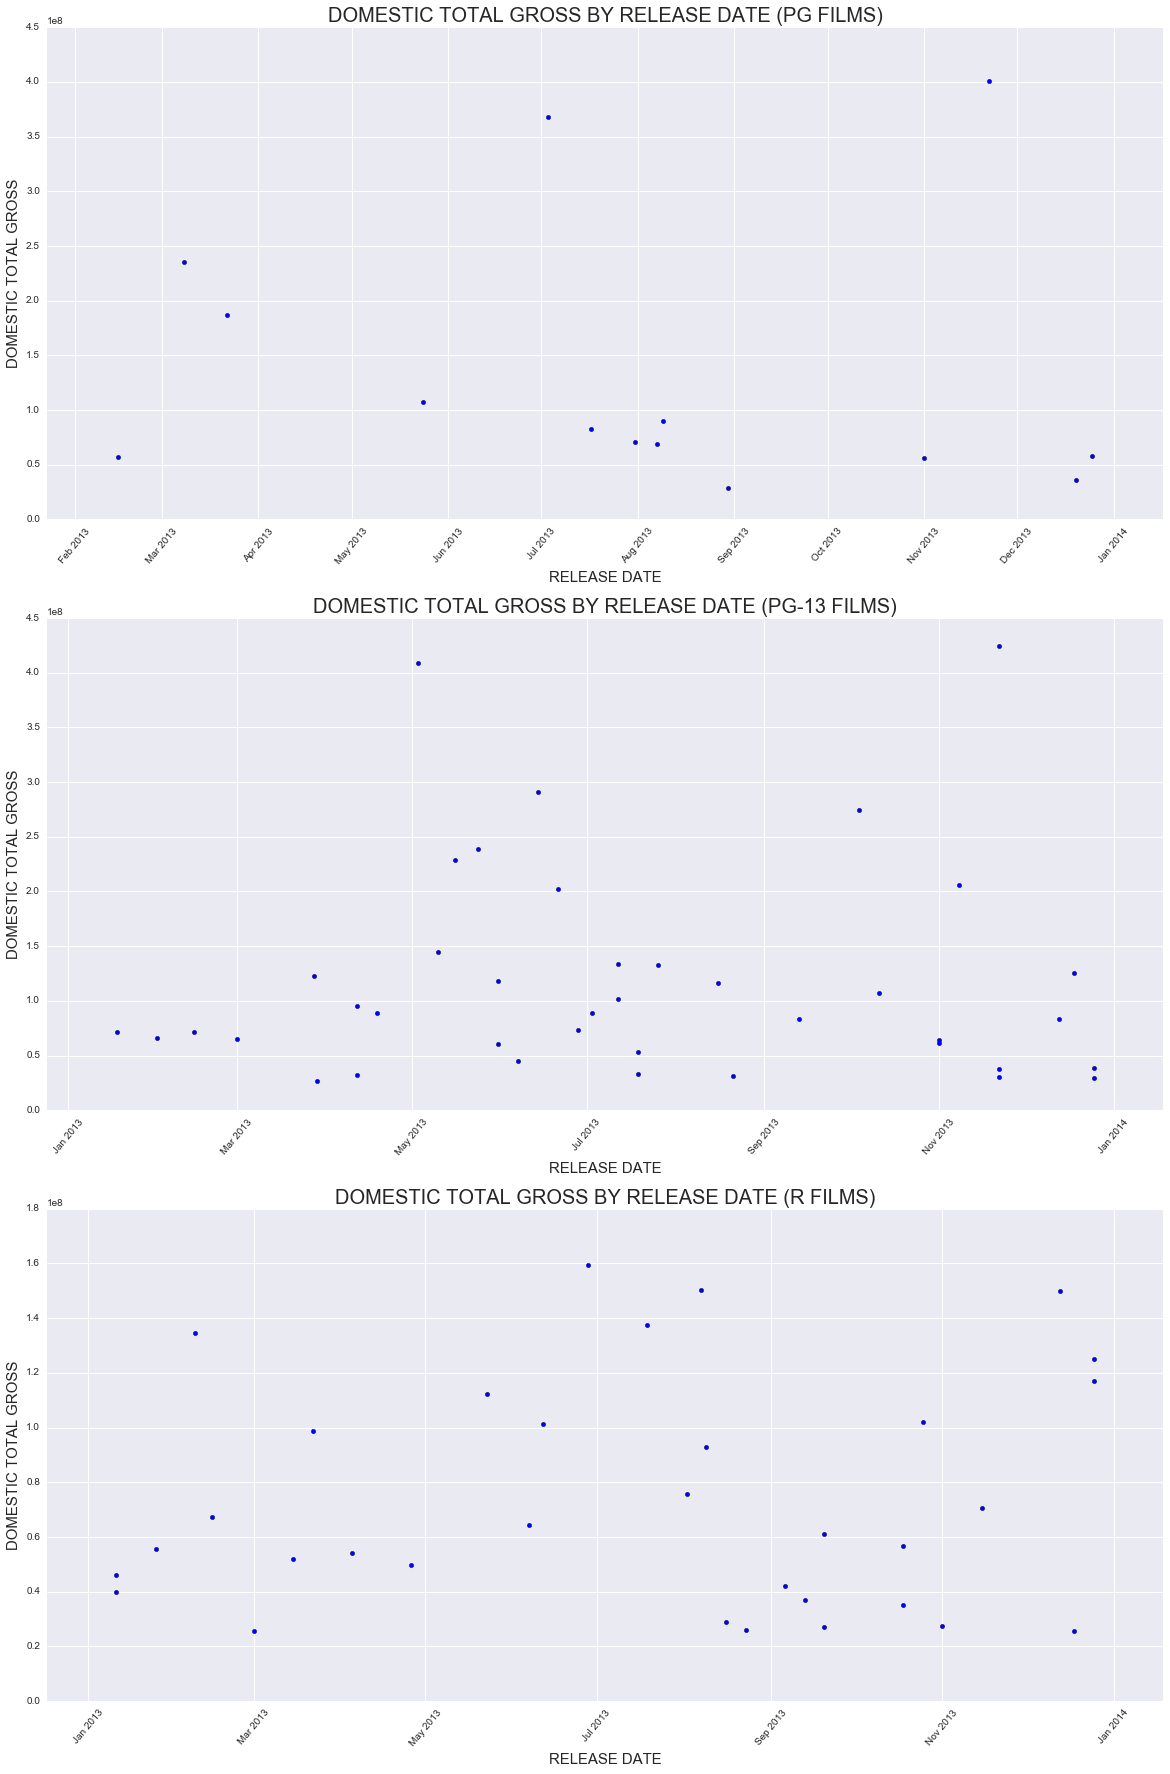

In [138]:
# create subplots
# 3 rows, 1 column (stacked plots)

plt.figure(figsize = (20,30))

plt.subplot(3,1,1) # numrows, numcols, subplot to start
plt.title('DOMESTIC TOTAL GROSS BY RELEASE DATE (PG FILMS)', fontsize = 20)
plt.scatter(np.array(pg_df.ReleaseDate), pg_df.DomesticTotalGross)
plt.xticks(rotation = 50)
plt.ylabel('DOMESTIC TOTAL GROSS', fontsize = 15)
plt.xlabel('RELEASE DATE', fontsize = 15)

plt.subplot(3,1,2)
plt.title('DOMESTIC TOTAL GROSS BY RELEASE DATE (PG-13 FILMS)', fontsize = 20)
plt.scatter(np.array(pg13_df.ReleaseDate), pg13_df.DomesticTotalGross)
plt.xticks(rotation = 50)
plt.ylabel('DOMESTIC TOTAL GROSS', fontsize = 15)
plt.xlabel('RELEASE DATE', fontsize = 15)

plt.subplot(3,1,3)
plt.title('DOMESTIC TOTAL GROSS BY RELEASE DATE (R FILMS)', fontsize = 20)
plt.scatter(np.array(r_df.ReleaseDate), r_df.DomesticTotalGross)
plt.xticks(rotation = 50)
plt.ylabel('DOMESTIC TOTAL GROSS', fontsize = 15)
plt.xlabel('RELEASE DATE', fontsize = 15)


#### Exercise 2.5
What director in your dataset has the highest gross per movie?  

Francis Lawrence has the highest gross per movie ($424,668,047).

In [139]:
(df
.groupby(['Director']) # grouping variable
.DomesticTotalGross # target variable to compute
.mean() # computation on the target variable
.reset_index()# must include if grouping and sorting by same col
.sort_values('DomesticTotalGross', ascending = False)
.head())

,Director,DomesticTotalGross
26,Francis Lawrence,424668047
76,Shane Black,409013994
15,Chris BuckJennifer Lee,400738009
67,Pierre CoffinChris Renaud,368061265
84,Zack Snyder,291045518


#### Exercise 2.6
Bin your dataset into months and make a bar graph ofthe mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic total Gross by Month in 2013.

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are 'reasonable'.

In [140]:
# construct a month variable from ReleaseDate (a datetime object)
df['Month'] = df.ReleaseDate.dt.month
df.Month.dtype

dtype('int64')

In [141]:
month_int = range(0,12) # 12 elements
month_str = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

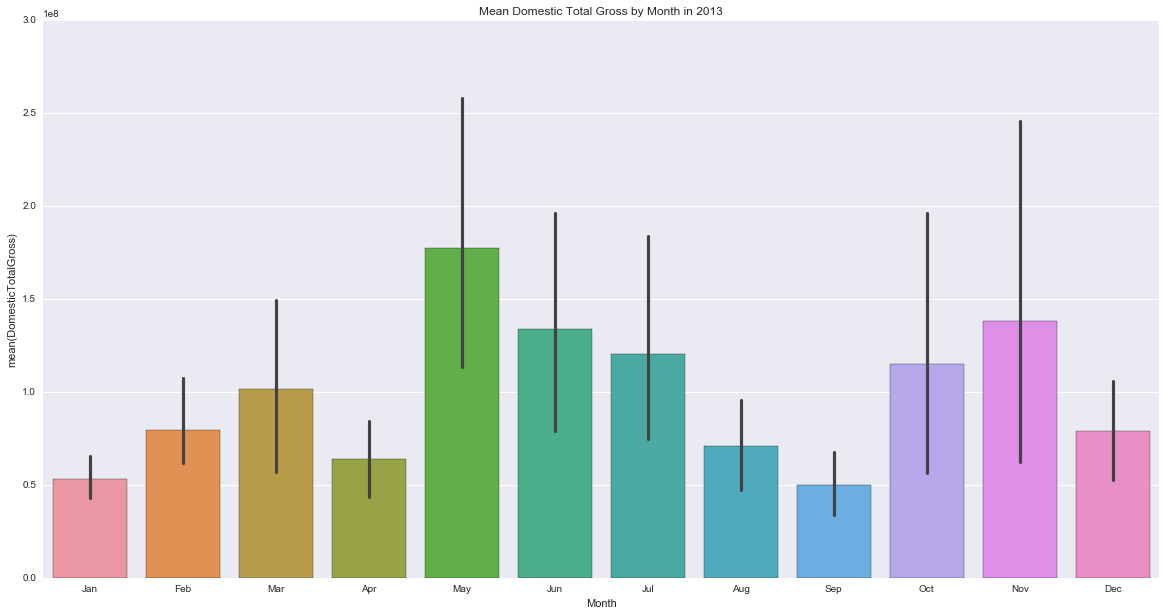

In [142]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df.Month, y = df.DomesticTotalGross)
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.xticks(month_int, month_str);

In [143]:
(df.
groupby(['Month'])
.aggregate(['count','std'])
.DomesticTotalGross
)

,count,std
Month,,
1,4,1.379313e+07
2,5,3.129481e+07
3,8,7.627210e+07
4,5,2.697393e+07
5,8,1.117754e+08
6,7,8.904160e+07
7,10,9.377013e+07
8,10,4.273738e+07
9,5,2.244539e+07


In [144]:
month_ct_std = (df.
groupby(['Month'])
.DomesticTotalGross
.aggregate(['count','std'])
.reset_index() # reset index and turn into a df
)
month_ct_std

,Month,count,std
0,1,4,1.379313e+07
1,2,5,3.129481e+07
2,3,8,7.627210e+07
3,4,5,2.697393e+07
4,5,8,1.117754e+08
5,6,7,8.904160e+07
6,7,10,9.377013e+07
7,8,10,4.273738e+07
8,9,5,2.244539e+07
9,10,5,9.394330e+07


The standard error of the sample mean (xbar) = std(xbar)/sqrt(n), where n is sample size.

In [145]:
# construct a new column for standard errors (by month)
month_ct_std['se'] = month_ct_std['std']/(month_ct_std['count']**0.5)
month_ct_std

,Month,count,std,se
0,1,4,1.379313e+07,6.896564e+06
1,2,5,3.129481e+07,1.399547e+07
2,3,8,7.627210e+07,2.696626e+07
3,4,5,2.697393e+07,1.206311e+07
4,5,8,1.117754e+08,3.951859e+07
5,6,7,8.904160e+07,3.365456e+07
6,7,10,9.377013e+07,2.965272e+07
7,8,10,4.273738e+07,1.351475e+07
8,9,5,2.244539e+07,1.003788e+07
9,10,5,9.394330e+07,4.201272e+07


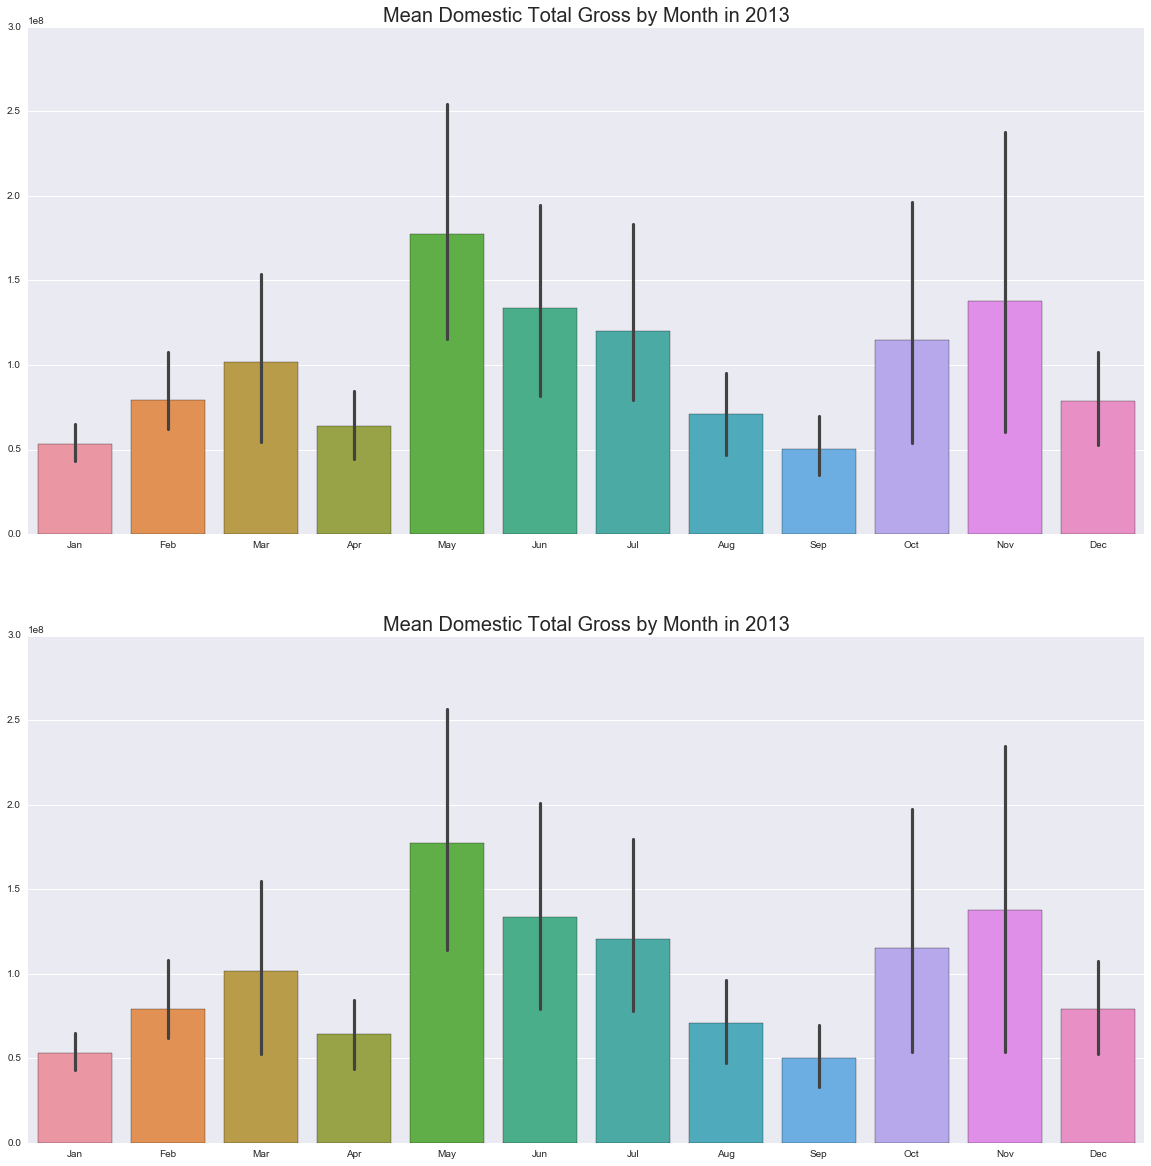

In [146]:
# default plot vs. plot with specified standard errors
plt.figure(figsize = (20, 20))

plt.subplot(2,1,1)
sns.barplot(x = df.Month, y = df.DomesticTotalGross)
plt.title('Mean Domestic Total Gross by Month in 2013', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(month_int, month_str);

plt.subplot(2,1,2)
sns.barplot(x = df.Month, y = df.DomesticTotalGross, yerr = month_ct_std.se)
plt.title('Mean Domestic Total Gross by Month in 2013', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(month_int, month_str);


Comparing the 2 barplots above, the standard errors seem reasonable.